In [1]:
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as T

from upsample_anything import UPA, dinov2_infer
from utils import visualize_pca_one, visualize_overlay
from PIL import Image
    
device = "cuda" if torch.cuda.is_available() else "cpu"


/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:54: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


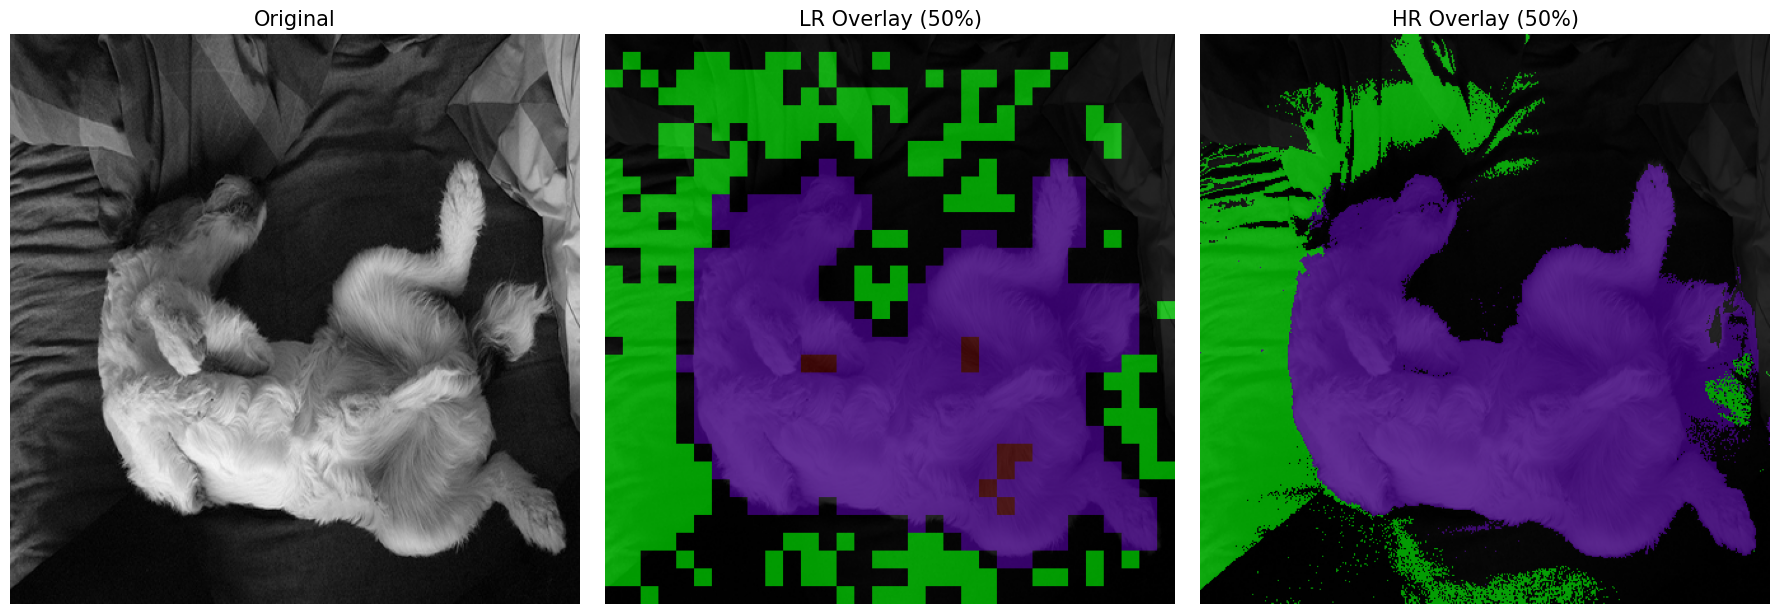

In [2]:
img_path = "../img/2009_003810.jpg"
img = Image.open(img_path).convert("RGB").resize((448, 448), Image.BICUBIC)

prob = np.load("../img/2009_003810_predlow_probs.npy")      # (21,32,32)
lr_prob = torch.from_numpy(prob).unsqueeze(0).cuda()  # (1,21,32,32)

hr_prob = UPA(img, lr_prob)  # (1,21,448,448)

visualize_overlay(img, lr_prob, hr_prob)
